In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
import numpy as np
import math

ancilla = QuantumRegister(1,'ancilla')
state = QuantumRegister(4, 'q')
classic = ClassicalRegister(1, 'c')

In [2]:
c1 = -0.138754
c2 = -0.152989
c3 = 0.164190
c4 = 0.144579
c5 = 0.111373
c6 = 0.146726
c7 = 0.169348
c8 = -0.035353
c9 = 0.035353

def createU1(qc, t):
    qc.barrier()
    qc.rz(-c1*t, 0)
    qc.crz(2*c2*t, 0, 1)
    qc.crz(2*c2*t, 0, 2)
    qc.crz(2*c3*t, 0, 3)
    qc.crz(2*c3*t, 0, 4)
    
    qc.cx(1, 2)
    qc.crz(2*c4*t, 0, 2)
    qc.cx(1, 2)
    qc.cx(1, 3)
    qc.crz(2*c5*t, 0, 3)
    qc.cx(1, 3)
    qc.cx(1, 4)
    qc.crz(2*c6*t, 0, 4)
    qc.cx(1, 4)
    qc.cx(2, 3)
    qc.crz(2*c6*t, 0, 3)
    qc.cx(2, 3)
    qc.cx(2, 4)
    qc.crz(2*c5*t, 0, 4)
    qc.cx(2, 4)
    qc.cx(3, 4)
    qc.crz(2*c7*t, 0, 4)
    qc.cx(3, 4)

def addAx(qc, i, inverse='no'):
    if inverse == 'no':
        qc.h(i)
    elif inverse == 'inverse':
        qc.h(i)
    else:
        error('False inversion command. It should be "no" or "inverse"')

def addAy(qc, i, inverse='no'):
    if inverse == 'no':
        qc.h(i)
        qc.s(i)
    elif inverse == 'inverse':
        qc.sdg(i)
        qc.h(i)
    else:
        error('False inversion command. It should be "no" or "inverse"')

def createU2(qc, t):
    qc.barrier()
    addAy(qc, 1)
    addAy(qc, 2)
    addAx(qc, 3)
    addAx(qc, 4)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.crz(2*c8*t, 0, 4)
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.cx(1, 2)
    addAy(qc, 1, 'inverse')
    addAy(qc, 2, 'inverse')
    addAx(qc, 3, 'inverse')
    addAx(qc, 4, 'inverse')

    addAx(qc, 1)
    addAy(qc, 2)
    addAy(qc, 3)
    addAx(qc, 4)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.crz(2*c9*t, 0, 4)
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.cx(1, 2)
    addAx(qc, 1, 'inverse')
    addAy(qc, 2, 'inverse')
    addAy(qc, 3, 'inverse')
    addAx(qc, 4, 'inverse')

    addAy(qc, 1)
    addAx(qc, 2)
    addAx(qc, 3)
    addAy(qc, 4)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.crz(2*c9*t, 0, 4)
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.cx(1, 2)
    addAy(qc, 1, 'inverse')
    addAx(qc, 2, 'inverse')
    addAx(qc, 3, 'inverse')
    addAy(qc, 4, 'inverse')

    addAx(qc, 1)
    addAx(qc, 2)
    addAy(qc, 3)
    addAy(qc, 4)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.crz(2*c8*t, 0, 4)
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.cx(1, 2)
    addAx(qc, 1, 'inverse')
    addAx(qc, 2, 'inverse')
    addAy(qc, 3, 'inverse')
    addAy(qc, 4, 'inverse')

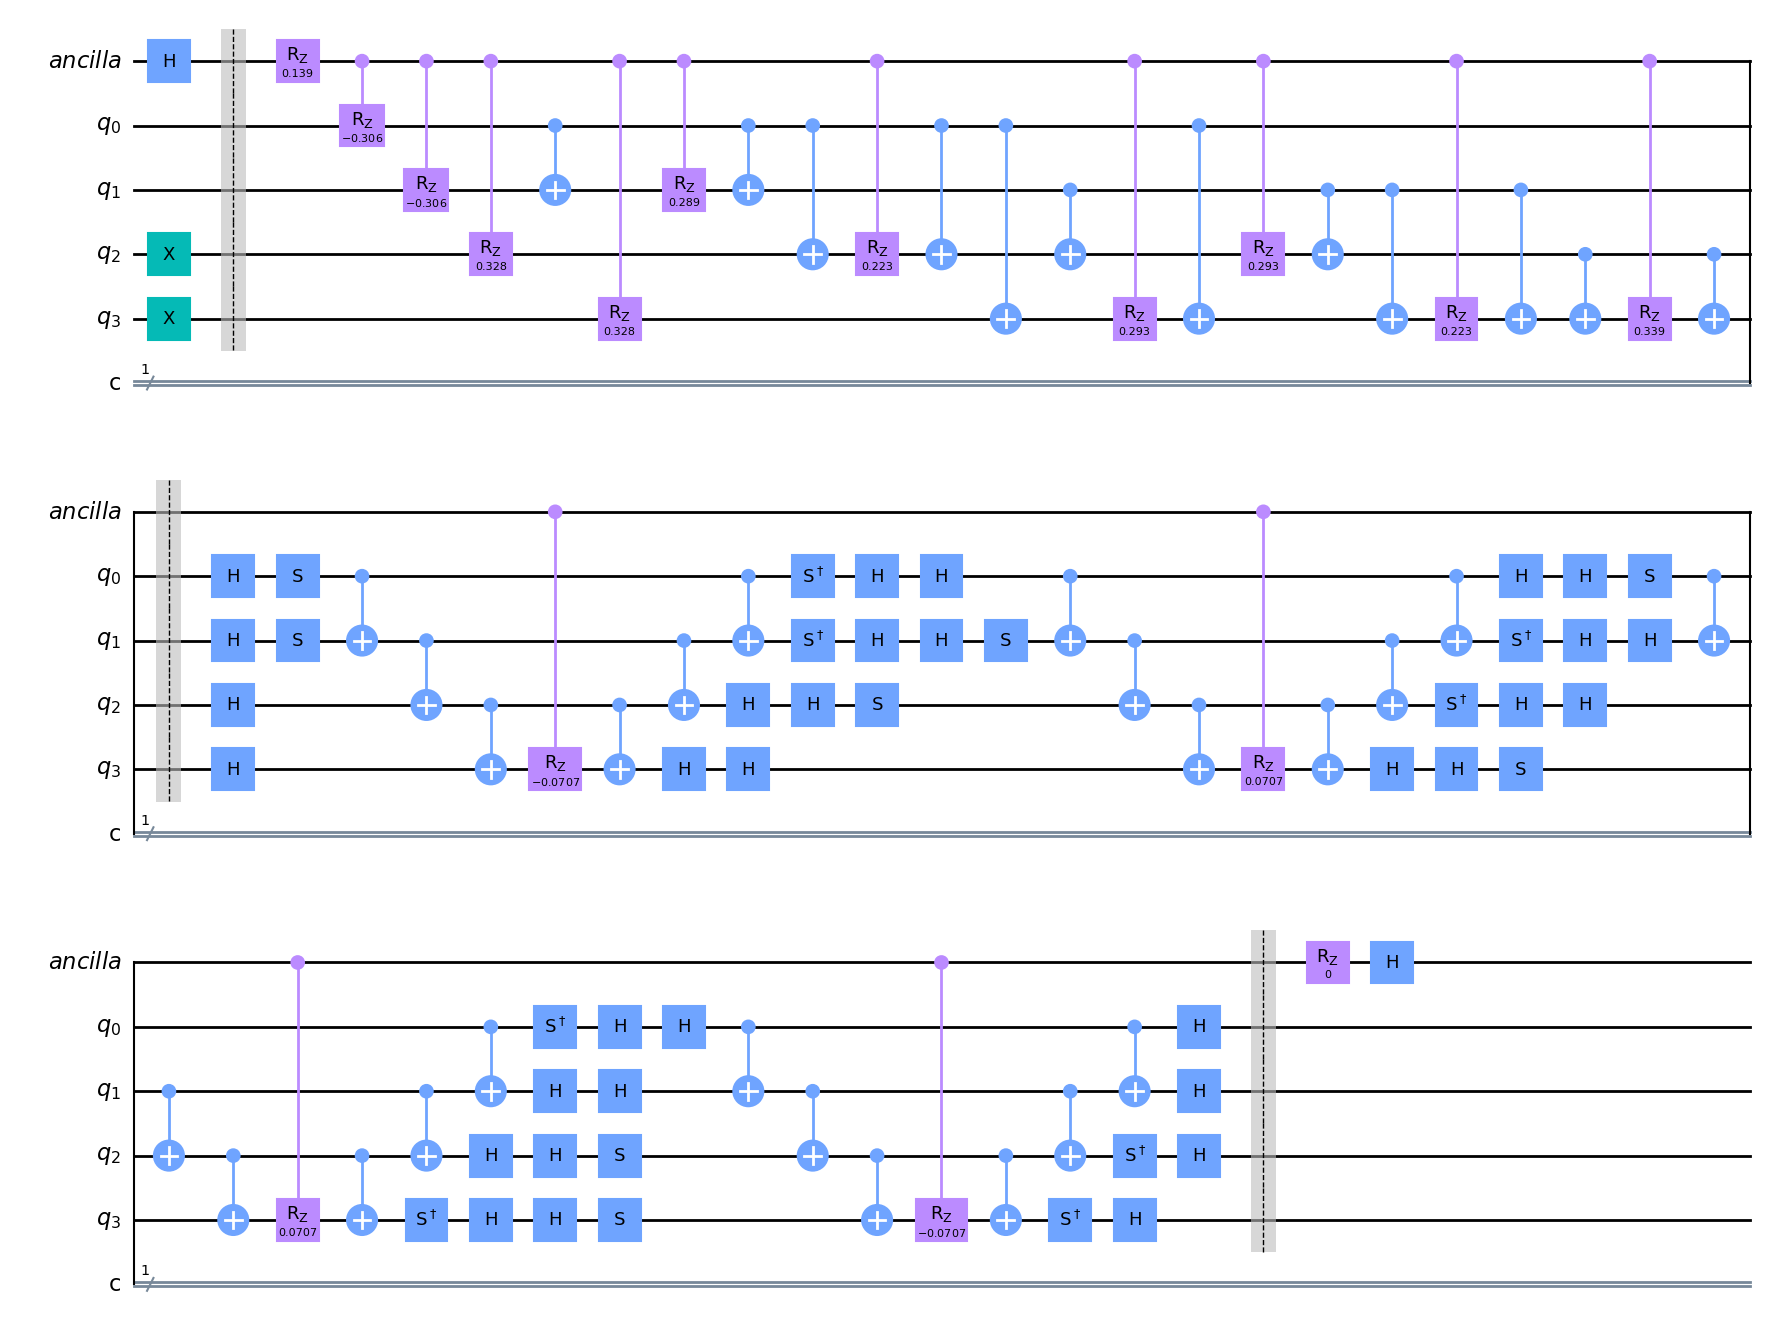

In [11]:
phases = []
for t in range(1,2):
    # t = 10
    phase_j = list(0 for i in range(t))
    
    # FIRST ITERATION
    k = t
    
    qc = QuantumCircuit(ancilla, state, classic)
    qc.x([3,4])
    qc.h(ancilla)
    
    angle_k = 0
    for i in range(2**(k-1)):
        createU1(qc,k)
        createU2(qc,k)
    
    qc.barrier()
    qc.rz(angle_k, 0)
    qc.h(0)
    # qc.measure(ancilla, classic)
    
    # #### EXECUTE SIMULATION ON THE BACKEND
    # backend = Aer.get_backend('qasm_simulator')
    # qc = transpile(qc, backend)
    # job = backend.run(qc)
    
    # counts = job.result().get_counts(qc)
    # num_0 = counts.get('0')
    # num_1 = counts.get('1')
    # if num_0 > num_1:
    #     phase_j[k-1] = 0
    # else:
    #     phase_j[k-1] = 1
    
    # SECOND ITERATION TILL K = 1
    for k in range(t-1, 0, -1):
        qc = QuantumCircuit(ancilla, state, classic)
        qc.x([3,4])
        qc.h(ancilla)
        phase = 0
        for j in range(k,t):
            phase = phase + phase_j[j]/2**j
        angle_k = -2*math.pi*phase*2**(k-1)
        
        for i in range(2**(k-1)):
            createU1(qc,k)
            createU2(qc,k)
        
        qc.barrier()
        qc.rz(angle_k, 0)
        qc.h(0)
        # qc.measure(ancilla, classic)
        
        # #### EXECUTE SIMULATION ON THE BACKEND
        # backend = Aer.get_backend('qasm_simulator')
        # qc = transpile(qc, backend)
        # job = backend.run(qc)
        
        # counts = job.result().get_counts(qc)
        # num_0 = counts.get('0')
        # num_1 = counts.get('1')
        # if num_0 > num_1:
        #     phase_j[k-1] = 0
        # else:
        #     phase_j[k-1] = 1
    
    # # GET THE PHASE
    # k = 0
    # phase = 0
    # for j in range(k,t):
    #     phase = phase + phase_j[j]/2**j
    # print(phase)
    # phases.append(phase)

qc.draw('mpl')

In [4]:
for phase in phases:
    print(math.e**(1j*2*math.pi*phase))
    print(math.cos(2*math.pi*phase))

(-1+3.6739403974420594e-16j)
-1.0


In [68]:
phases = []
phases.append(1)
phases.append(2)

print(phases)

[1, 2]
